# Proyecto Modelado Predictivo


---


## Objetivo de Desarrollo Sostenible No.8 Trabajo Decente y Crecimiento Económico

---

## Integrantes:


*   Arias Morales Yahir
*   [@Isomorfismo](https://github.com/Isomorfismo)
*   Piña del Valle José
*   Rivera García Axel Maximiliano

## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.5f}'.format

## Importación de los datos

In [ ]:
df = pd.read_csv("concentradohogarproyecto.csv")
df = df.drop(columns="Unnamed: 0")

In [ ]:
df = df[df['ingtrab'] != 0]

## Entendimiento del problema

In [ ]:
# Filas y columnas
print("Filas y columnas del DataFrame:")
print(df.shape)

Filas y columnas del DataFrame:
(78567, 9)


In [ ]:
#Variables a utilizar
print("Variables a utilizar:")
print(pd.DataFrame(df.columns))

Variables a utilizar:
            0
0     trabajo
1     sueldos
2     tam_loc
3   est_socio
4   sexo_jefe
5  educa_jefe
6  horas_extr
7   gasto_mon
8     ingtrab


In [ ]:
#Distribución de nuestra variable objetivo, en este caso del ingreso por trabajo
print("Distribución de la variable objetivo (ingreso por trabajo):")
print(df["ingtrab"].describe())

Distribución de la variable objetivo (ingreso por trabajo):
count     78567.00000
mean      34811.60225
std       40317.09938
min           2.93000
25%       13475.27000
50%       25573.77000
75%       44881.95000
max     3950804.34000
Name: ingtrab, dtype: float64


In [ ]:
# Informacion del número, tipo y nombre de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78567 entries, 0 to 89005
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trabajo     78567 non-null  float64
 1   sueldos     78567 non-null  float64
 2   tam_loc     78567 non-null  int64  
 3   est_socio   78567 non-null  int64  
 4   sexo_jefe   78567 non-null  int64  
 5   educa_jefe  78567 non-null  int64  
 6   horas_extr  78567 non-null  float64
 7   gasto_mon   78567 non-null  float64
 8   ingtrab     78567 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 6.0 MB


In [ ]:
# Mostrar estadísticas importantes para el análisis de datos
df.describe(include='all')

,trabajo,sueldos,tam_loc,est_socio,sexo_jefe,educa_jefe,horas_extr,gasto_mon,ingtrab
count,78567.00000,78567.00000,78567.00000,78567.00000,78567.00000,78567.00000,78567.00000,78567.00000,78567.00000
mean,29027.52740,25022.71923,2.53470,2.05084,1.26738,5.70965,198.30487,29045.12073,34811.60225
std,37774.69308,32749.19430,1.31424,0.80728,0.44259,2.51634,1723.88120,25261.05549,40317.09938
min,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,2.93000
25%,6629.09000,5606.55000,1.00000,2.00000,1.00000,4.00000,0.00000,14811.72500,13475.27000
50%,20983.69000,18295.06000,3.00000,2.00000,1.00000,6.00000,0.00000,22960.86000,25573.77000
75%,39485.68000,34336.95000,4.00000,2.00000,2.00000,8.00000,0.00000,35258.88000,44881.95000
max,3950804.34000,3292336.95000,4.00000,4.00000,2.00000,11.00000,250219.77000,1007112.49000,3950804.34000


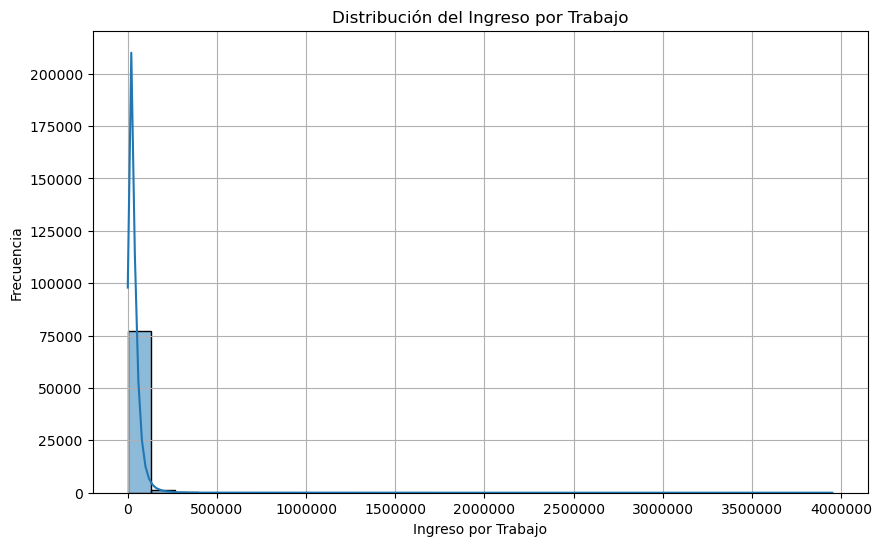

In [ ]:
#Distribución del ingreso por trabajo
plt.figure(figsize=(10, 6))
sns.histplot(df['ingtrab'], bins=30, kde=True)
plt.title('Distribución del Ingreso por Trabajo')
plt.xlabel('Ingreso por Trabajo')
plt.ylabel('Frecuencia')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.show()

In [ ]:
# Correlaciones entre variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
print(correlation_matrix)

            trabajo  sueldos  tam_loc  est_socio  sexo_jefe  educa_jefe  \
trabajo     1.00000  0.96789 -0.20980    0.29518   -0.05317     0.31259   
sueldos     0.96789  1.00000 -0.19653    0.28388   -0.05446     0.29607   
tam_loc    -0.20980 -0.19653  1.00000   -0.65853   -0.09152    -0.34101   
est_socio   0.29518  0.28388 -0.65853    1.00000    0.07200     0.42115   
sexo_jefe  -0.05317 -0.05446 -0.09152    0.07200    1.00000    -0.05760   
educa_jefe  0.31259  0.29607 -0.34101    0.42115   -0.05760     1.00000   
horas_extr  0.12876  0.07436 -0.03372    0.03440   -0.01199     0.03789   
gasto_mon   0.53004  0.51842 -0.21973    0.31835   -0.04115     0.34628   
ingtrab     0.89448  0.86374 -0.17672    0.26287   -0.06934     0.28624   

            horas_extr  gasto_mon  ingtrab  
trabajo        0.12876    0.53004  0.89448  
sueldos        0.07436    0.51842  0.86374  
tam_loc       -0.03372   -0.21973 -0.17672  
est_socio      0.03440    0.31835  0.26287  
sexo_jefe     -0.01199  

<Figure size 1200x800 with 0 Axes>

## Limipieza y preprocesamiento de datos

### Variables numericas

In [ ]:
# Seleccionar todas las variables numericas y eliminar ingtrab que es la variable que se busca predecir
df_numericas = df.select_dtypes(include=float)
df_numericas = df_numericas.drop(columns=["ingtrab"])

df_numericas

,trabajo,sueldos,horas_extr,gasto_mon
0,0.00000,0.00000,0.00000,24626.04000
1,22254.09000,21639.34000,0.00000,20397.10000
2,24098.35000,23606.55000,0.00000,44955.73000
3,71557.37000,67868.85000,0.00000,82950.42000
4,48113.11000,47213.11000,0.00000,30140.68000
...,...,...,...,...
88999,3913.04000,0.00000,0.00000,19035.27000
89001,0.00000,0.00000,0.00000,6808.18000
89002,0.00000,0.00000,0.00000,9845.39000
89004,18836.06000,18836.06000,0.00000,19219.14000


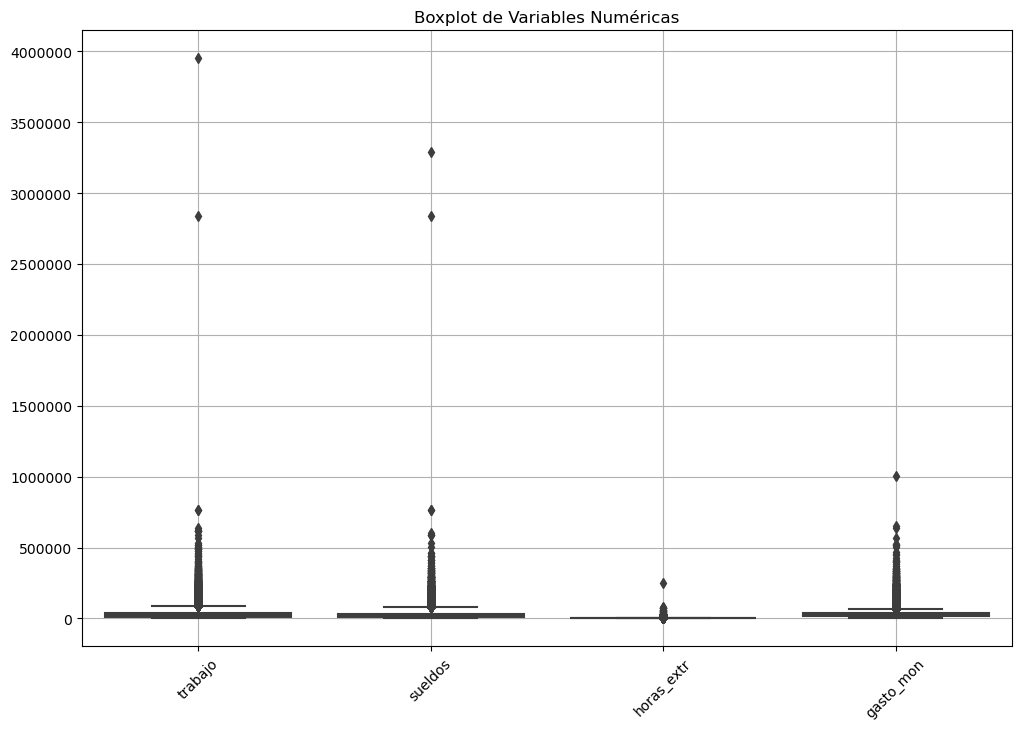

In [ ]:
#Visualizacion de valores atipicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numericas)
plt.title('Boxplot de Variables Numéricas')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

### Variables categoricas

In [ ]:
# Seleccion de las variables de tipo categórico
df_categoricas = df.select_dtypes(include=int)

<Figure size 1200x800 with 0 Axes>

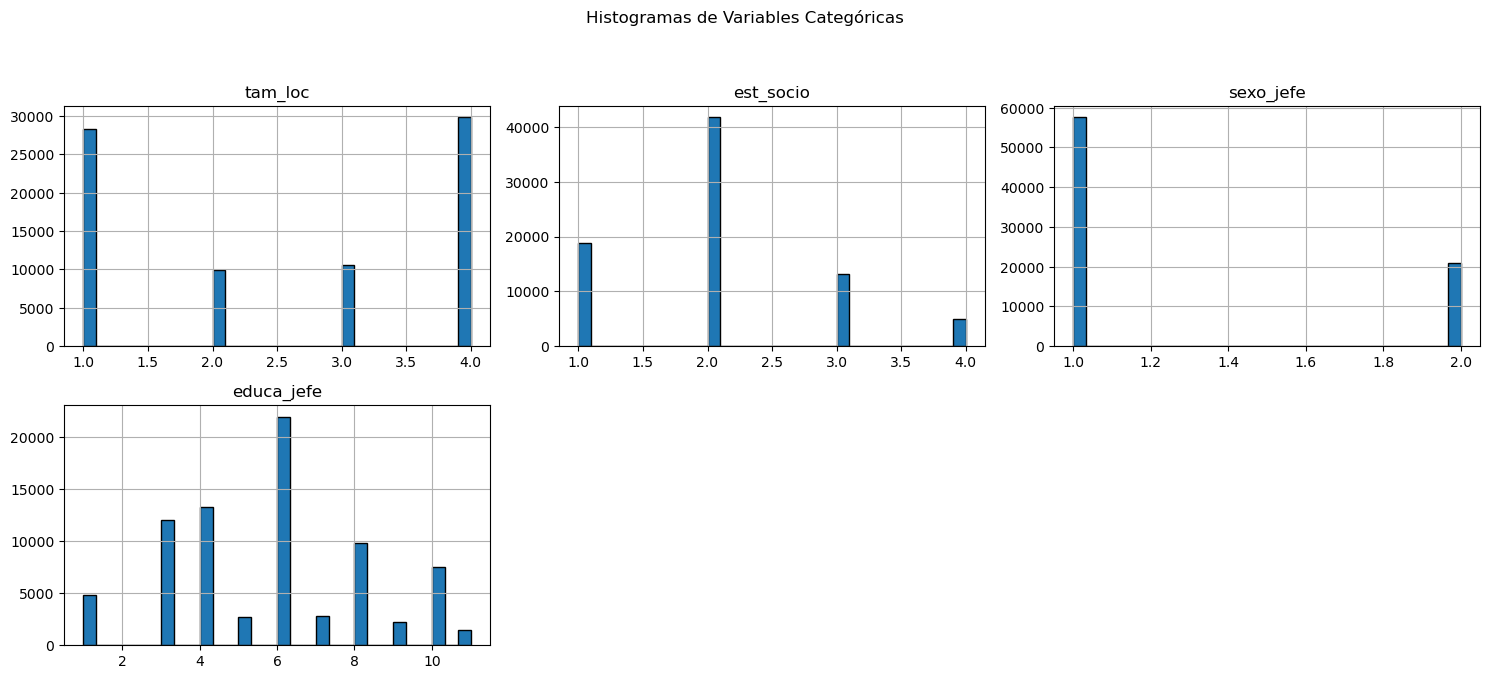

In [ ]:
#histograma de variables categoricas
plt.figure(figsize=(12, 8))
df_categoricas.hist(bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle('Histogramas de Variables Categóricas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Limpieza de outliers
def remove_outliers(df, threshold=3):
    for col in df:
        mean = df[col].mean()
        std_dev = df[col].std()
        outliers = (df[col] - mean).abs() > threshold * std_dev
        df = df[~outliers]
    return df

df_cleaned = remove_outliers(df.copy(), threshold=3)

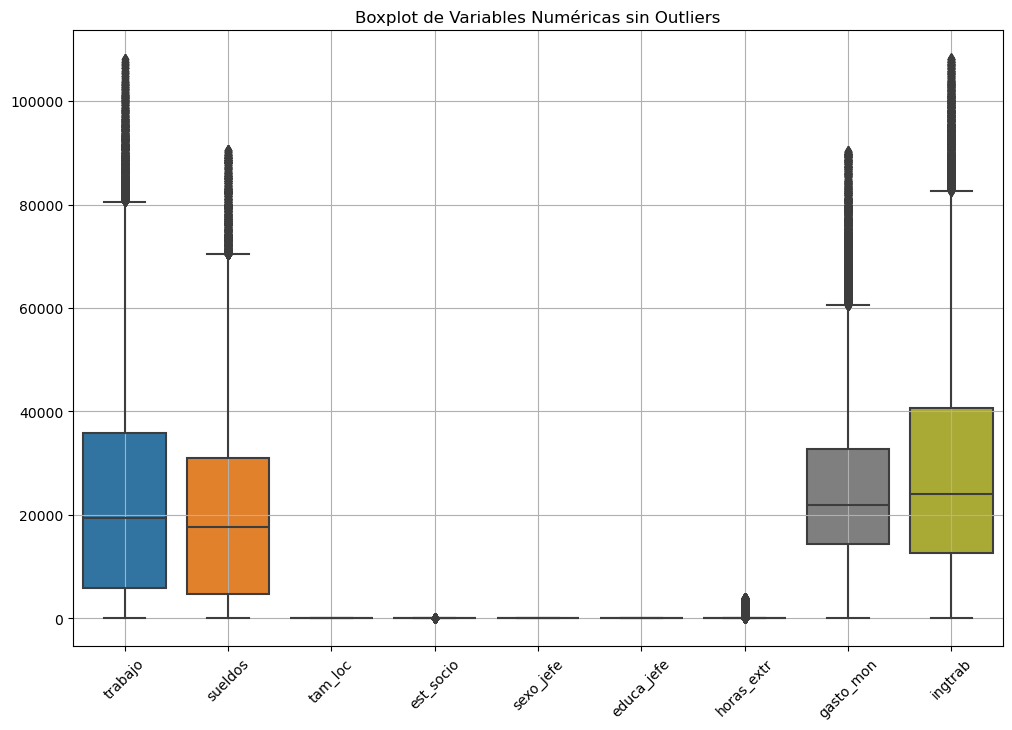

In [ ]:
# Visualizacion de las columnas sin outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned)
plt.title('Boxplot de Variables Numéricas sin Outliers')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

In [ ]:
# Contar valores únicos por columna
unique_counts = df.nunique()
print("Valores únicos por columna:")
print(unique_counts)

Valores únicos por columna:
trabajo       34671
sueldos       15064
tam_loc           4
est_socio         4
sexo_jefe         2
educa_jefe       11
horas_extr     1337
gasto_mon     77926
ingtrab       51153
dtype: int64


## Transformación logaritmica de los datos

In [ ]:
#Transformación de las varibles numericas
def transform_numerical(df):
    for col in df.select_dtypes(include=float).columns:
        if df[col].skew() > 1 or df[col].skew() < -1:
            df[col] = np.log1p(df[col])
    return df

In [ ]:
#Transformacion Box-Cox
def transform_boxcox(df):
    for col in df.select_dtypes(include=float).columns:
        if df[col].skew() > 1 or df[col].skew() < -1:
            df[col], _ = stats.boxcox(df[col] + 1)
    return df

In [ ]:
# df = transform_numerical(df)

In [ ]:
#df = transform_boxcox(df)

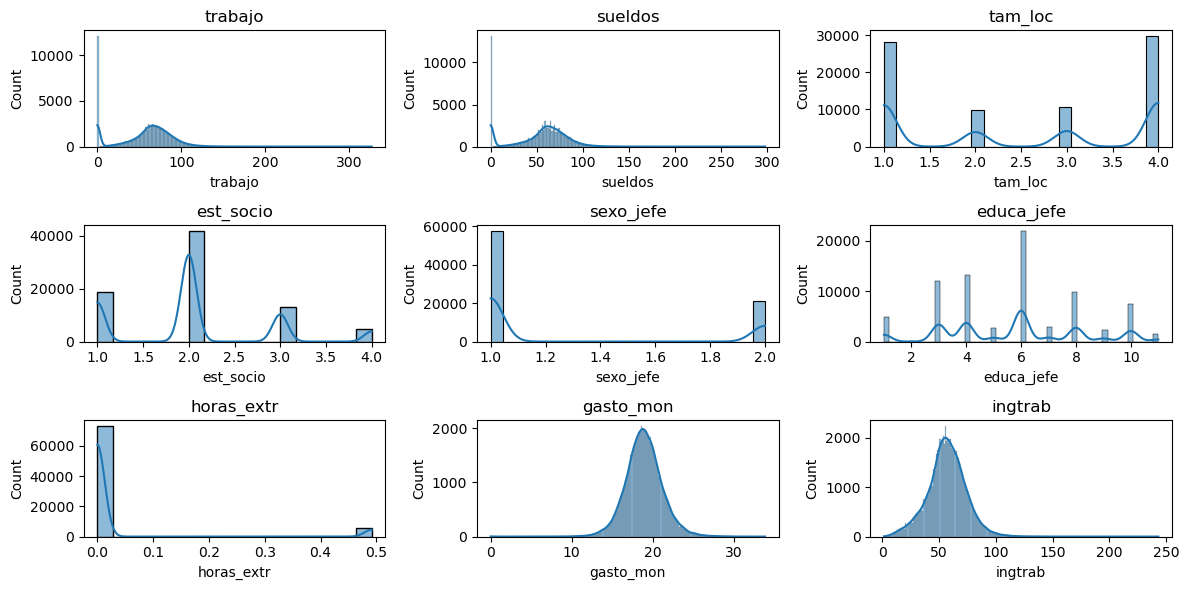

In [ ]:
#Distribucion de todas las variables
plt.figure(figsize=(12, 6))
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

## Analisis Exploratorio de Datos (EDA)

### Ingreso vs las demas variables

#### Variables numericas

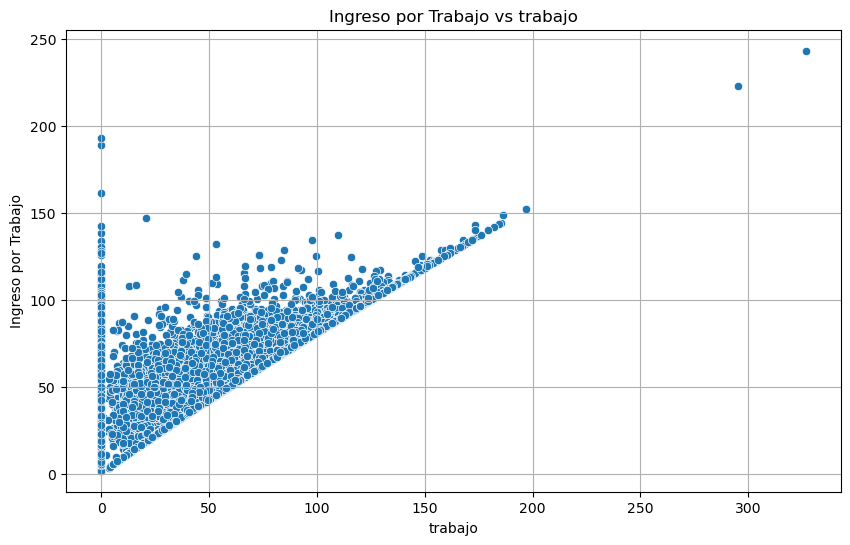

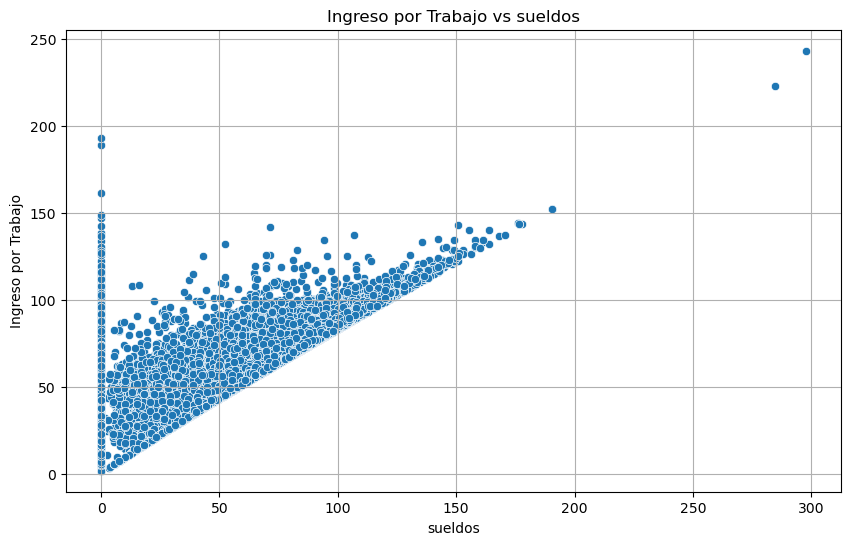

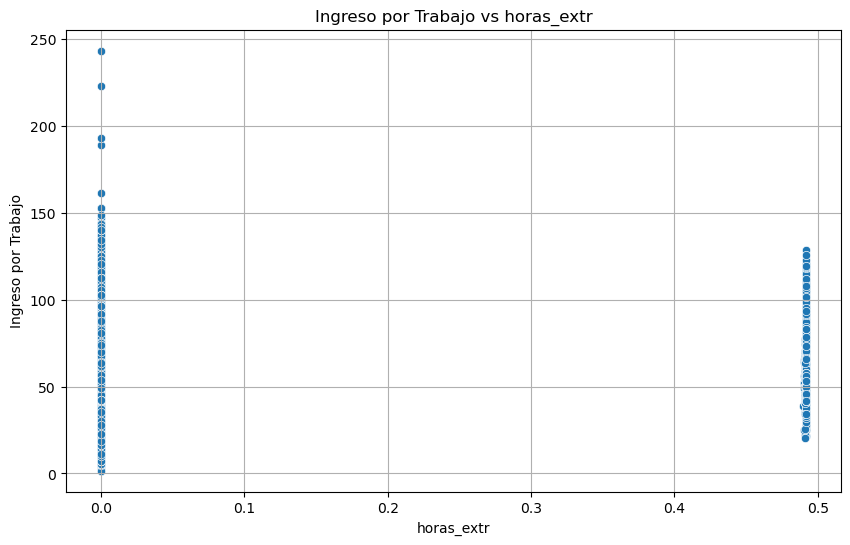

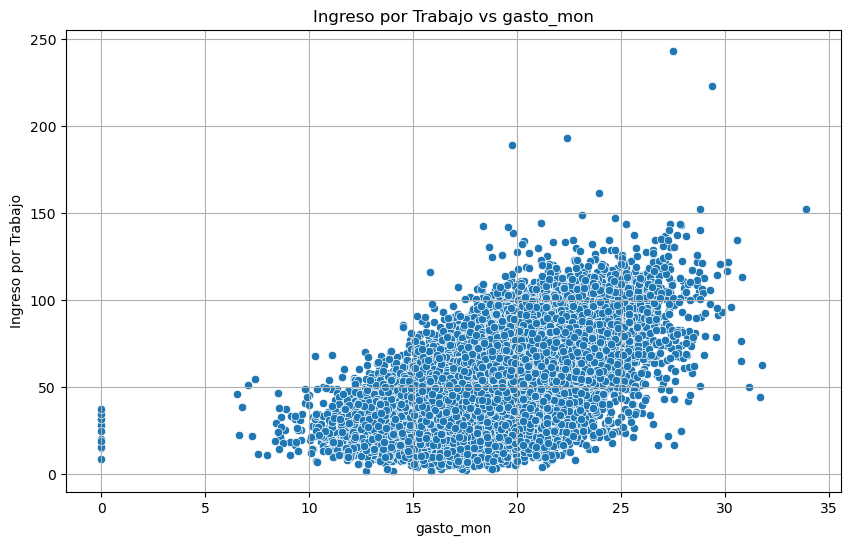

In [ ]:
#Ingreso por trabajo vs otras variables numericas

df_numericas = df.select_dtypes(include=float)
df_numericas = df_numericas.drop(columns=["ingtrab"])
for col in df_numericas.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col], y=df['ingtrab'])
    plt.title(f'Ingreso por Trabajo vs {col}')
    plt.xlabel(col)
    plt.ylabel('Ingreso por Trabajo')
    plt.ticklabel_format(style='plain', axis='x')
    plt.grid()
    plt.show()

### Variables categoricas

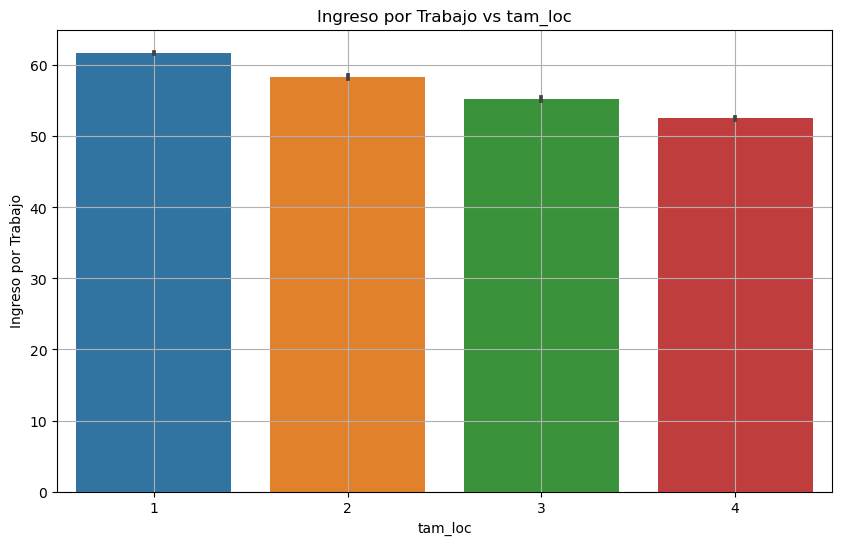

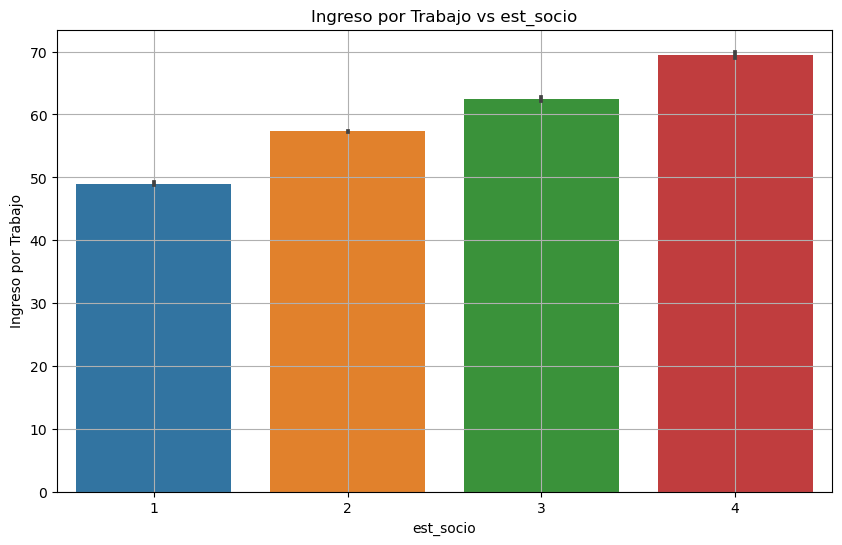

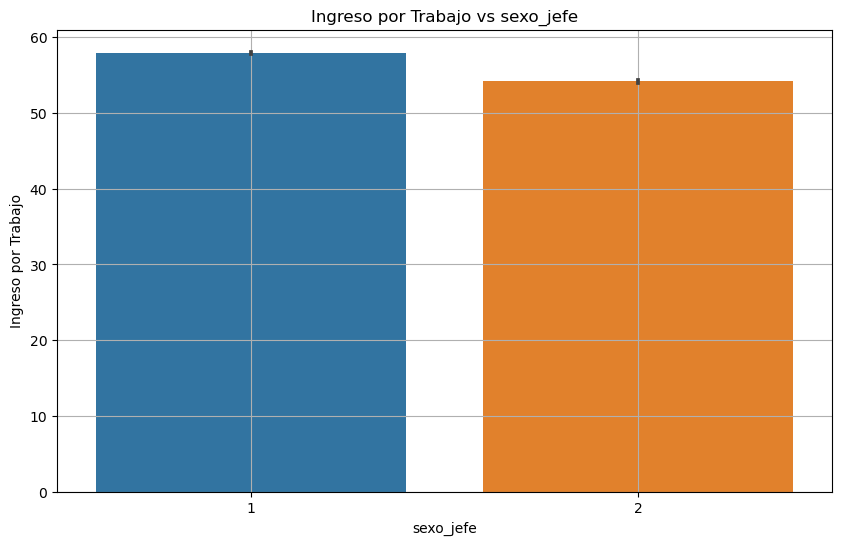

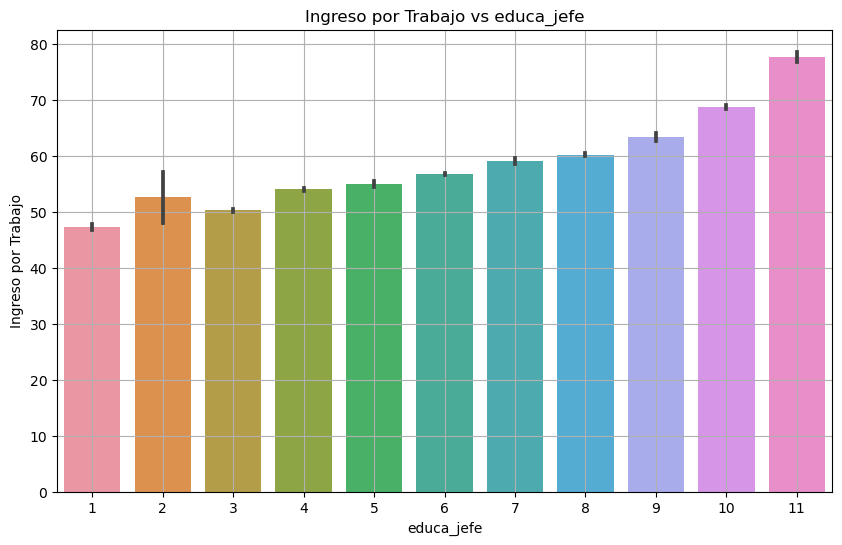

In [ ]:
# ingtrab vs variables categoricas
df_categoricas = df.select_dtypes(include=int)
for col in df_categoricas.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df[col], y=df['ingtrab'])
    plt.title(f'Ingreso por Trabajo vs {col}')
    plt.xlabel(col)
    plt.ylabel('Ingreso por Trabajo')
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid()
    plt.show()

## Visualización de los Q - Q plots

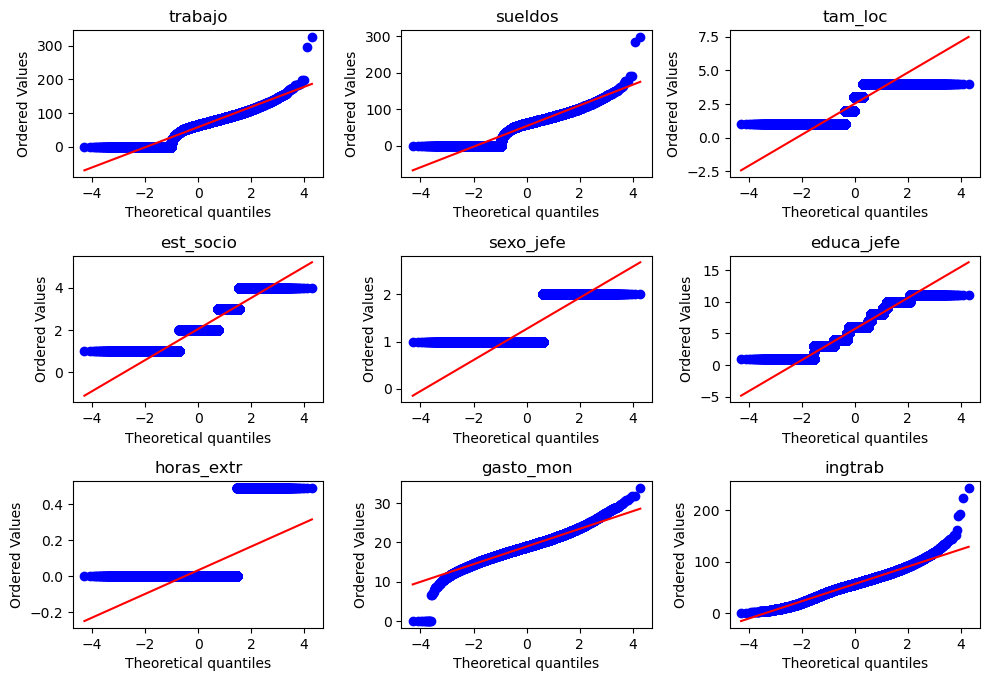

In [ ]:
# Gráficas que muestran que tanto los datos se aproximan a una distribución normal estandar
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns):
    plt.subplot(num_cols, 3, i+1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)
plt.tight_layout()

##### Dado que nuestro enfoque es saber la desigualdad, algunas graficas que podrian ser utilies

,sexo_jefe,count,mean,std,min,25%,50%,75%,max
0,1,57560.00000,57.94034,16.57435,1.66601,48.16029,57.78655,68.01685,243.14523
1,2,21007.00000,54.15035,17.05383,1.66601,44.34834,54.91456,65.17189,147.09982


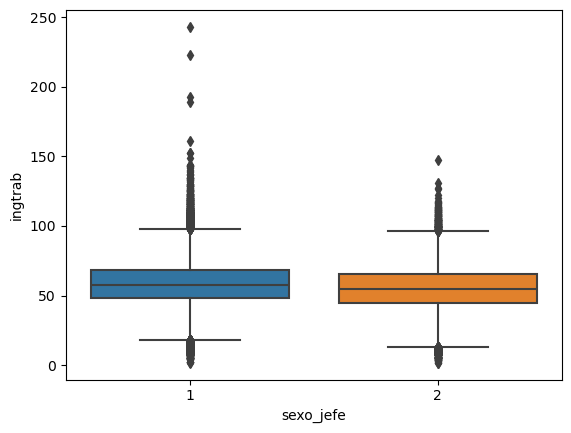

In [ ]:
# Visualizacion de los datos del ingreso de los sexos de los jefes de familia
sns.boxplot(x='sexo_jefe', y='ingtrab', data=df)
df.groupby('sexo_jefe')['ingtrab'].describe().reset_index()

,educa_jefe,count,mean,std,min,25%,50%,75%,max
0,1,4817.00000,47.27932,16.65998,1.66601,36.52776,48.11696,58.37899,127.45968
1,2,19.00000,52.61256,10.79943,29.67905,45.32629,53.26881,59.46350,69.59014
2,3,12037.00000,50.32031,16.21127,2.55813,40.18271,51.10587,60.86997,128.03899
3,4,13215.00000,54.05302,15.68745,2.29300,45.00148,54.57486,64.12922,192.87165
4,5,2701.00000,54.96719,14.63919,7.07786,46.44427,55.21686,64.28543,125.52051
5,6,21933.00000,56.78886,14.73630,2.54818,48.39748,56.86927,65.88386,223.01265
6,7,2824.00000,59.11751,14.49890,3.37163,51.05439,59.01482,67.92961,131.76574
7,8,9777.00000,60.24419,14.77032,6.59817,51.51497,60.47909,69.43979,137.30184
8,9,2254.00000,63.31472,16.55925,9.33276,53.50930,63.65007,73.30795,134.13820
9,10,7499.00000,68.70957,17.10123,5.25331,58.65022,68.80164,79.27673,152.41101


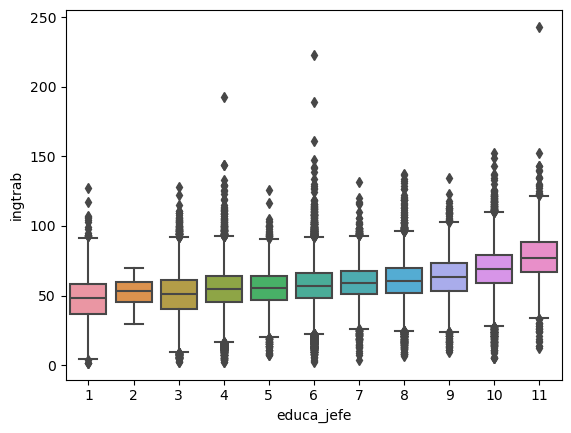

In [ ]:
# Visualizacion de los datos del ingreso del hogar agrupado por educacion del jefe
sns.boxplot(x='educa_jefe', y='ingtrab', data=df)
df.groupby('educa_jefe')['ingtrab'].describe().reset_index()

,tam_loc,count,mean,std,min,25%,50%,75%,max
0,1,28248.00000,61.72360,16.55912,2.29300,52.18933,61.64967,71.63738,243.14523
1,2,9890.00000,58.30666,15.78169,4.51381,48.99945,58.51408,67.89287,192.87165
2,3,10600.00000,55.23498,15.61938,3.37163,45.92558,55.31795,65.13295,147.09982
3,4,29829.00000,52.52843,16.45035,1.66601,42.61385,52.93064,62.68633,188.99098


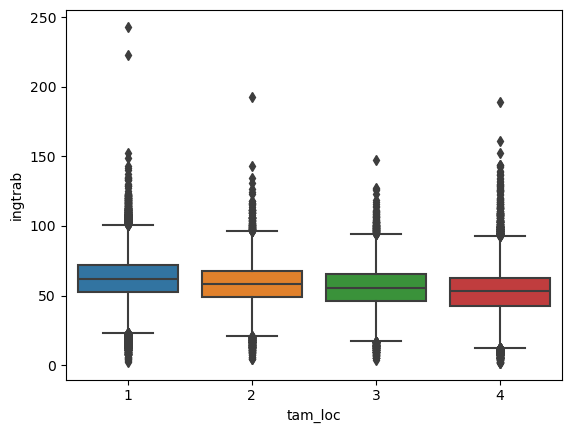

In [ ]:
# Visualizacion de los datos del ingreso del hogar agrupado por tamaño de la localidad en la que se encuentra el hogar
sns.boxplot(x='tam_loc', y='ingtrab', data=df)
df.groupby('tam_loc')['ingtrab'].describe().reset_index()

,est_socio,count,mean,std,min,25%,50%,75%,max
0,1,18836.00000,48.99381,15.70768,1.66601,39.17289,49.49084,58.73218,188.99098
1,2,41770.00000,57.30266,15.41929,2.29300,48.63653,57.56701,66.85033,192.87165
2,3,13092.00000,62.46060,16.55653,3.39135,52.91136,62.84664,72.69688,243.14523
3,4,4869.00000,69.51507,18.19770,8.33066,58.53967,69.14801,80.29830,223.01265


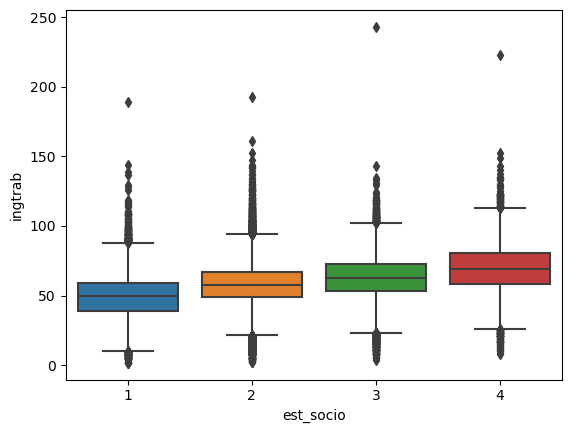

In [ ]:
# Visualización de los datos del ingreso del hogar agrupado por estrato socieconomico
sns.boxplot(x='est_socio', y='ingtrab', data=df)
df.groupby('est_socio')['ingtrab'].describe().reset_index()

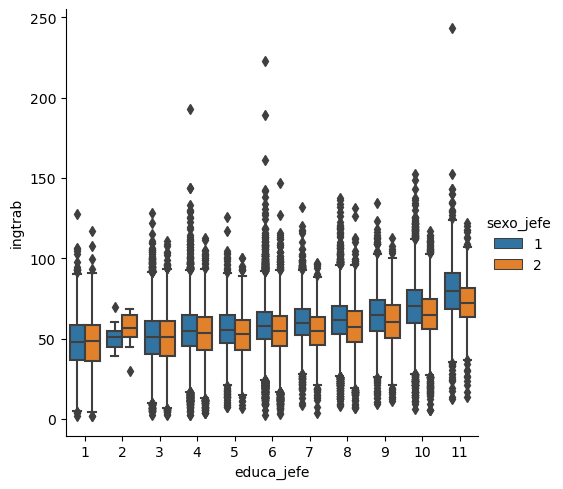

In [ ]:
# visualizacion de los datos agrupado por sexo del jefe
sns.catplot(x='educa_jefe', y='ingtrab', hue='sexo_jefe', kind='box', data=df)

## ANOVA

In [ ]:
#Funcion que realiza el ANOVA de diferentes variables categoricas
def anova_categorical(df, target, categorical_vars):
    results = {}
    for var in categorical_vars:
        model = ols(f'{target} ~ C({var})', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        results[var] = anova_table['PR(>F)'][0]
    return pd.DataFrame(results, index=['p-value']).T

In [ ]:
anova_categorical_vars = ['sexo_jefe', 'educa_jefe', 'tam_loc', 'est_socio']
anova_results = anova_categorical(df, 'ingtrab', anova_categorical_vars)
print("Resultados del ANOVA para variables categóricas:")
print(anova_results)

Resultados del ANOVA para variables categóricas:
            p-value
sexo_jefe   0.00000
educa_jefe  0.00000
tam_loc     0.00000
est_socio   0.00000


En el calulo del ANOVA, dado que los p-value son < 0.05, significa que las variables categoricas son extremadamente significantes con respecto a la variable objetivo que es el ingreso por trabajo.

In [ ]:
def tukey_test(df, target, categorical_var):
    tukey = pairwise_tukeyhsd(endog=df[target], groups=df[categorical_var], alpha=0.05)
    return tukey

La prueba Tukey HSD (Honest Significant Difference) nos ayuda a encontrar diferencias significativas entre los diferentes grupos de la variables categoricas, con un 95% de confianza. Asi pues tomamos que el p-value sea < 0.05 para que la **hipotesis nula** (Existe diferencia significativa entre un grupo y otro) se pueda rechazar, en otro caso no hay diferencia significativa entre esos grupos.

In [ ]:
print("Resultados del test de Tukey para 'sexo_jefe':")
print(tukey_test(df, 'ingtrab', 'sexo_jefe'))

Resultados del test de Tukey para 'sexo_jefe':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2    -3.79   0.0 -4.0539 -3.5261   True
---------------------------------------------------


Primeramente para el sexo del jefe del hogar, la diferencia que hay entre hombres y mujeres con respecto a su ingreso por trabajo es significativa de acuerdo a su p-value, por lo tanto la hipotesis nula se rechaza.

In [ ]:
print("Resultados del test de Tukey para 'educa_jefe':")
print(tukey_test(df, 'ingtrab', 'educa_jefe'))

Resultados del test de Tukey para 'educa_jefe':
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   5.3332 0.9248  -6.2186 16.8851  False
     1      3    3.041    0.0   2.1842  3.8978   True
     1      4   6.7737    0.0   5.9279  7.6195   True
     1      5   7.6879    0.0   6.4798  8.8959   True
     1      6   9.5095    0.0   8.7099 10.3092   True
     1      7  11.8382    0.0  10.6471 13.0292   True
     1      8  12.9649    0.0  12.0802 13.8495   True
     1      9  16.0354    0.0  14.7529 17.3179   True
     1     10  21.4303    0.0  20.5023 22.3582   True
     1     11  30.4444    0.0   28.955 31.9337   True
     2      3  -2.2923 0.9999 -13.8305   9.246  False
     2      4   1.4405    1.0 -10.0969 12.9779  False
     2      5   2.3546 0.9999   -9.215 13.9242  False
     2      6   4.1763 0.9861  -7.3578 15.7104  False
     2      7   6.5049 0.7745  -5.

Ahora para la educacion del jefe del hogar, con respecto a su ingreso por trabajo.

- Las personas que tiene como estudio formal el preescolar, no tienen mucha diferencia significativa con el ingreso hasta las personas que ya tienen un estudio profesional completo, las causas pueden ser a que las personas son de una edad adulta con tiempo ya trabajando y que los que tengan estudio profesional sean recien graduados. (Curioso)

- Tampoco las personas que tienen la primaria terminada como las que tienen la secundaria incompleta hay diferencias significativas. Practicamente los dos grupos tienen la misma escolaridad.

- Entre todos los demas grupos si existe una diferencia significativa.

In [ ]:
print("Resultados del test de Tukey para 'est_socio':")
print(tukey_test(df, 'ingtrab', 'est_socio'))

Resultados del test de Tukey para 'est_socio':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   8.3088   0.0  7.9511  8.6666   True
     1      3  13.4668   0.0  13.003 13.9306   True
     1      4  20.5213   0.0 19.8659 21.1766   True
     2      3   5.1579   0.0  4.7496  5.5662   True
     2      4  12.2124   0.0 11.5951 12.8297   True
     3      4   7.0545   0.0  6.3702  7.7387   True
---------------------------------------------------


Para los estratos socioeconomicos tambien existe una diferencia significativa entre los grupos, sobre todo entre los que son de un estrato bajo con los de estrato alto, pero tambien entre los de estrato bajo con los de medio alto.

In [ ]:
print("Resultados del test de Tukey para 'tam_loc':")
print(tukey_test(df, 'ingtrab', 'tam_loc'))

Resultados del test de Tukey para 'tam_loc':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -3.4169   0.0 -3.9061 -2.9278   True
     1      3  -6.4886   0.0 -6.9655 -6.0117   True
     1      4  -9.1952   0.0 -9.5428 -8.8476   True
     2      3  -3.0717   0.0  -3.657 -2.4863   True
     2      4  -5.7782   0.0  -6.264 -5.2924   True
     3      4  -2.7065   0.0   -3.18 -2.2331   True
---------------------------------------------------


En cuestion del tamaño de la localidad si existe diferencia entre los grupos que pertenecen a una localidad con un tamaño en concreto. La prueba nos dice que en localidades de 100,000 habitantes (normalmente grandes ciudades) existe una gran diferencia entre las personas que son de comunidades rurales de alrededor de menos de 2,500 habitantes.

## Correlaciones entre las variables

### Pearson

In [ ]:
#Pearson
def pearson_correlation(df, target, numerical_vars):
    results = {}
    for var in numerical_vars:
        corr, p_value = stats.pearsonr(df[target], df[var])
        results[var] = {'correlation': corr, 'p-value': p_value}
    return pd.DataFrame(results).T

numerical_vars = df.select_dtypes(include=float).columns.tolist()
target = 'ingtrab'
pearson_results = pearson_correlation(df, target, numerical_vars)
print("Resultados de la correlación de Pearson:")
print(pearson_results)

Resultados de la correlación de Pearson:
            correlation  p-value
trabajo         0.78072  0.00000
sueldos         0.75136  0.00000
horas_extr      0.15588  0.00000
gasto_mon       0.62865  0.00000
ingtrab         1.00000  0.00000


Las correlaciones nos indican que la varibales trabajo es la que mas se relaciona con la de ingreso por trabajo, aunque tambien el gasto monetario que se hace en los hogares esta relacionado con el ingreso. Como en anteriores graficos se cumple que mientras mas se ingresa mas es la capacidad de gasto.

### Spearman

In [ ]:
#Spearman
def spearman_correlation(df, target, numerical_vars):
    results = {}
    for var in numerical_vars:
        corr, p_value = stats.spearmanr(df[target], df[var])
        results[var] = {'correlation': corr, 'p-value': p_value}
    return pd.DataFrame(results).T

spearman_results = spearman_correlation(df, target, numerical_vars)
print("Resultados de la correlación de Spearman:")
print(spearman_results)

Resultados de la correlación de Spearman:
            correlation  p-value
trabajo         0.85978  0.00000
sueldos         0.83134  0.00000
horas_extr      0.17470  0.00000
gasto_mon       0.63395  0.00000
ingtrab         1.00000  0.00000


Ahora con la correlación de Spearman, podemos decir que nuestras variables no tienen del todo un comportamiento lineal sino no lineal. Lo que nos puede intuir que se necesita un modelo como la regresión polinomial o algun tipo de regresor especial, sea un árbol u otro modelo.

## Construcción del modelo

### Modelos seleccionados: Regresion lineal multiple, Polinomica, Arbol de Decisión, Bosque aleatorio

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


### División del conjunto de datos

In [ ]:
X = df.drop(columns=['ingtrab'])
y = df['ingtrab']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### Regresión lineal

In [ ]:
linear_model = LinearRegression()
resultados = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2').mean()

print("Resultados de la validación cruzada del modelo lineal:")
print(resultados)

Resultados de la validación cruzada del modelo lineal:
0.6918274363750785


### Regresion polinomica

In [ ]:
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

resultados_poly = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()
print("Resultados de la validación cruzada del modelo polinómico:")
print(resultados_poly)

Resultados de la validación cruzada del modelo polinómico:
0.7730007760550128


### Árbol de decisión

In [ ]:
tree = DecisionTreeRegressor(random_state=0)
resultados_tree = cross_val_score(tree, X_train, y_train, cv=5, scoring='r2').mean()

print("Resultados de la validación cruzada del modelo de árbol de decisión:")
print(resultados_tree)

Resultados de la validación cruzada del modelo de árbol de decisión:
0.5647646480780277


### Bosque Aleatorio

In [ ]:
bosque = RandomForestRegressor(random_state=0)
resultados_bosque = cross_val_score(bosque, X_train, y_train, cv=5, scoring='r2').mean()

print("Resultados de la validación cruzada del modelo de bosque aleatorio:")
print(resultados_bosque)

Resultados de la validación cruzada del modelo de bosque aleatorio:
0.7537865961263253


## Modelo final

#### Finalmente la regresión polinomica fue la que tuvo mejor desempeño, aunque por cuestión de recursos tambien el bosque aleatorio se podria tomar en cuenta.

#### Regresión polinomica

In [ ]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del modelo polinómico:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Resultados del modelo polinómico:
Mean Squared Error: 58.89787219199597
R^2 Score: 0.7868123451629553


### Ecuación de nuestro modelo de regresión polinomica

In [ ]:
variables = pipeline.named_steps['poly_features'].get_feature_names_out(X.columns)

# Obtener coeficientes
coefs = pipeline.named_steps['linear_regression'].coef_
intercept = pipeline.named_steps['linear_regression'].intercept_

#Transformar los coeficientes de vuelta al espacio original
coefs = np.exp(coefs) - 1
intercept = np.exp(intercept) - 1

# Armar la ecuación en formato texto
ecuacion = f"y = {intercept:.3f}"
for coef, nombre in zip(coefs, variables):
    sign = " + " if coef >= 0 else " - "
    ecuacion += f"{sign}{abs(coef):.3f}*{nombre}"

print(ecuacion)

y = -0.995 + 0.000*1 + 0.818*trabajo - 0.103*sueldos + 0.384*tam_loc + 1.242*est_socio + 0.207*sexo_jefe + 2.057*educa_jefe - 1.000*horas_extr + 3.667*gasto_mon + 0.004*trabajo^2 + 0.002*trabajo sueldos - 0.002*trabajo tam_loc - 0.002*trabajo est_socio + 0.078*trabajo sexo_jefe - 0.005*trabajo educa_jefe - 0.015*trabajo horas_extr - 0.037*trabajo gasto_mon - 0.001*sueldos^2 - 0.003*sueldos tam_loc + 0.005*sueldos est_socio + 0.003*sueldos sexo_jefe - 0.000*sueldos educa_jefe + 0.074*sueldos horas_extr + 0.001*sueldos gasto_mon - 0.042*tam_loc^2 + 0.418*tam_loc est_socio - 0.122*tam_loc sexo_jefe + 0.017*tam_loc educa_jefe - 0.020*tam_loc horas_extr - 0.017*tam_loc gasto_mon + 0.105*est_socio^2 + 0.045*est_socio sexo_jefe + 0.078*est_socio educa_jefe - 0.134*est_socio horas_extr - 0.132*est_socio gasto_mon + 0.760*sexo_jefe^2 - 0.214*sexo_jefe educa_jefe - 0.026*sexo_jefe horas_extr - 0.284*sexo_jefe gasto_mon - 0.009*educa_jefe^2 - 0.182*educa_jefe horas_extr - 0.025*educa_jefe gasto_m

### Bosque aleatorio

In [ ]:
bosque.fit(X_train, y_train)
y_pred_bosque = bosque.predict(X_test)

mse_bosque = mean_squared_error(y_test, y_pred_bosque)
r2_bosque = r2_score(y_test, y_pred_bosque)

print("Resultados del modelo de bosque aleatorio:")
print(f"Mean Squared Error: {mse_bosque}")
print(f"R^2 Score: {r2_bosque}")

Resultados del modelo de bosque aleatorio:
Mean Squared Error: 64.51809110200684
R^2 Score: 0.7664693133265887


#### Visualización del árbol, de modo que veamos como el bosque funciono

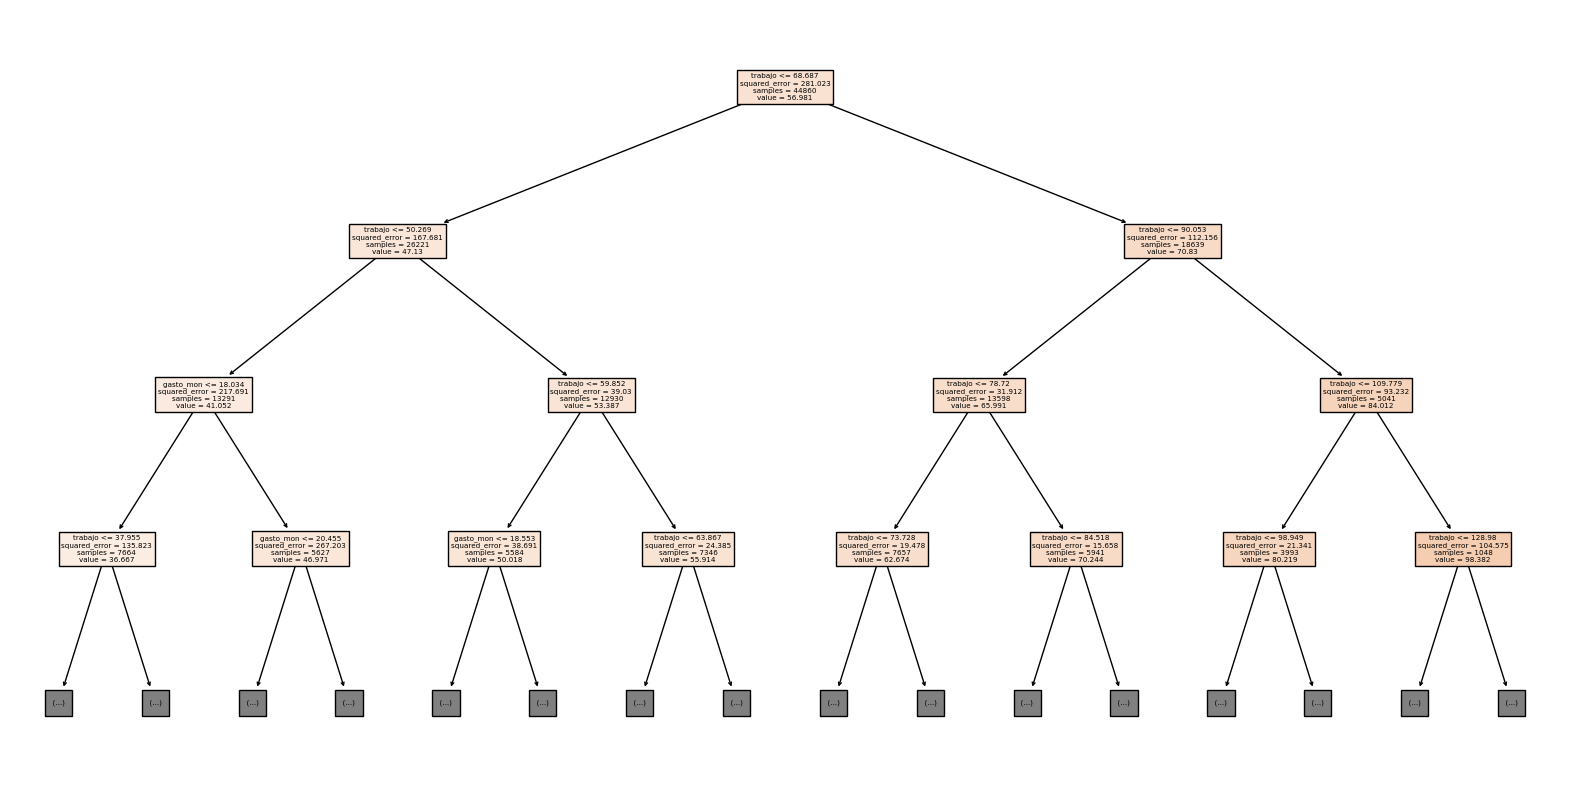

In [ ]:
#Visualizacion de un arbol del bosque aleatorio
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(bosque.estimators_[0], feature_names=X.columns, max_depth=3, filled=True)
plt.show()


#### Visualización del bosque

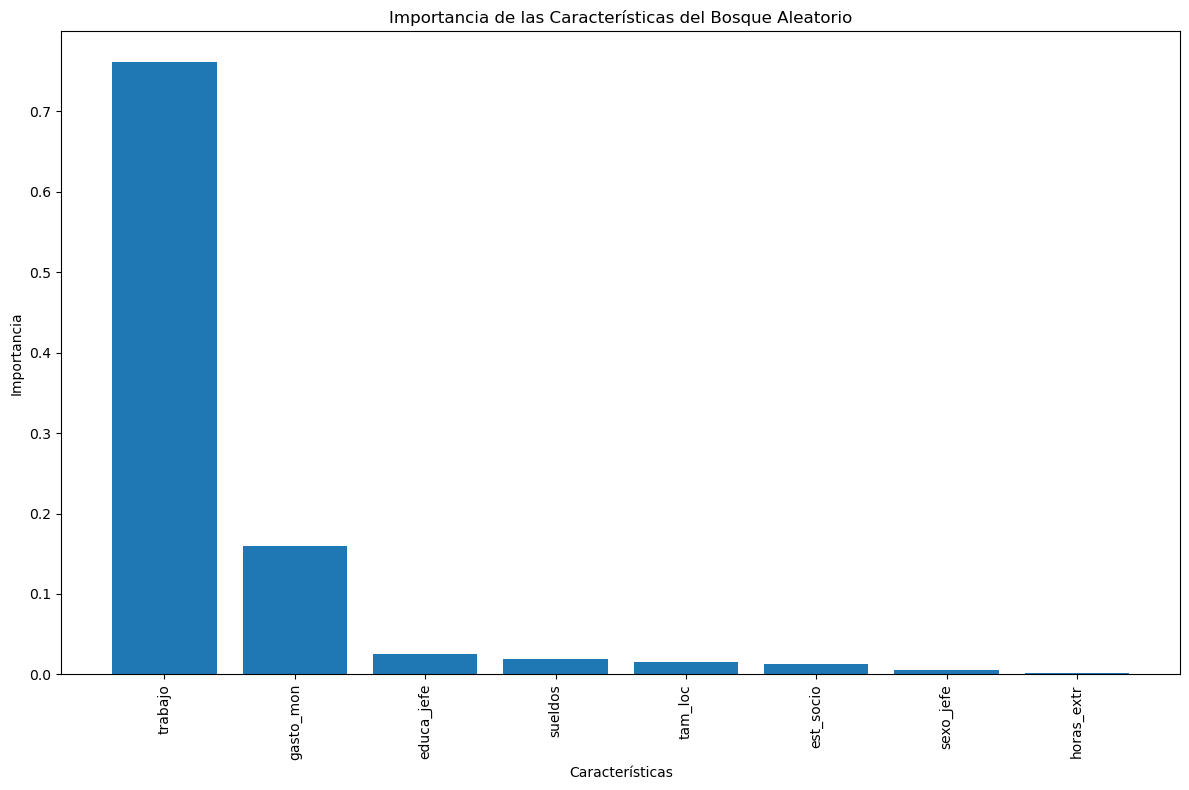

In [ ]:
#Visualizacion del bosque aleatorio
plt.figure(figsize=(12, 8))
importances = bosque.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Importancia de las Características del Bosque Aleatorio')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

### Conclusiones

Este proyecto logró integrar exitosamente el análisis exploratorio de datos y la predicción del ingreso por sueldo de los hogares en México, utilizando datos de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH). A través de una plataforma interactiva desarrollada con Streamlit, se ofreció una experiencia visual y dinámica que permite comprender los factores que inciden en el ingreso laboral.

Durante el análisis exploratorio, se aplicaron herramientas estadísticas y gráficas que revelaron patrones importantes: por ejemplo, se observó que el nivel educativo del jefe de hogar y el estatus socioeconómico tienen una relación directa con los ingresos, mientras que el tamaño de la localidad mostró una relación inversa, probablemente debido a mayores costos de vida en zonas urbanas. Además, se identificaron variables con baja correlación, así como valores atípicos que fueron tratados adecuadamente para evitar sesgos.

El modelo predictivo fue construido mediante una fórmula ajustada basada en regresión polinomial, que toma en cuenta múltiples interacciones entre variables como sueldos, educación, gasto, horas extra, sexo del jefe de hogar y otras. Este enfoque permitió generar estimaciones personalizadas del ingreso laboral con base en las características socioeconómicas del hogar. La funcionalidad para guardar múltiples predicciones y compararlas gráficamente ofrece una herramienta poderosa para el análisis comparativo y la simulación de escenarios.

La plataforma final permite no solo visualizar y analizar los datos originales, sino también explorar cómo cambios en diferentes variables afectan el ingreso predicho. Esta herramienta tiene potencial para ser utilizada en contextos educativos, gubernamentales y de análisis social, promoviendo la toma de decisiones informadas basadas en datos reales y modelado estadístico.

En conclusión, este proyecto demuestra cómo la integración de ciencia de datos, visualización interactiva y modelado predictivo puede aportar valor en la comprensión de fenómenos económicos complejos como el ingreso laboral en México.